
Week 2
실습 #1: California Housing Price 집값 예측 회귀 모델 학습하기

## 0. Linear Regression with Toy-Example

In [1]:
# 선형 회귀 모델을 정규 방정식을 통해 도출하기
# Linear Regression model via 'Normal Equation' at Lecture #04 (2020-09-21)
import numpy as np
X = np.array([[5.0,3.4,1.5,0.2],[6.1,2.8,4.7,1.2],[6.9,3.1,5.1,2.3],[5.8,2.7,4.1,1.0]])
y = np.array([[2],[1],[3],[1]])

# Normal Equation: (X^T*X)^-1 * X^T * y
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
print(theta)

# For this case, X is invertible so we can use a simplified equation: (X)^-1 * y
theta_simp = np.matmul(np.linalg.inv(X),y)
print(theta_simp)

# You can check theta & theta_simp are identical :)

[[ 0.04312268]
 [ 0.75390335]
 [-0.76728625]
 [ 1.86022305]]
[[ 0.04312268]
 [ 0.75390335]
 [-0.76728625]
 [ 1.86022305]]


In [2]:
# Scikit-learn 라이브러리를 활용한 회귀 모델 학습
# Linear Regression model via 'scikit-learn' at Lecture #04 (2020-09-21)
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([[5.0,3.4,1.5,0.2],[6.1,2.8,4.7,1.2],[6.9,3.1,5.1,2.3],[5.8,2.7,4.1,1.0]])
y = np.array([[2],[1],[3],[1]])

# generate model by using training set
lin_reg = LinearRegression(fit_intercept=False)       # set theta_0 = 0, i.e., we will not use a bias term for linear regression. If you want to use it, erasue "fit_intercept=False" or set it to be "Ture".
lin_reg.fit(X, y)             # learn the linear regression model named as "lin_reg" by using 'fit' function in LinearRegression function of sklearn.
print(lin_reg.coef_)          # theta_1 ~ 4 for this case. The coefficients or weights are same as we obtained via numpy function.
                              # When we set "fit-intervept=True", then the solution is not same as one obtained via numpy function.
print(lin_reg.intercept_)     # intercept means a bias term in linear algebra (theta_0 in our lecture note)

[[ 0.04312268  0.75390335 -0.76728625  1.86022305]]
0.0


# **실습 #1-0 (복습): California Housing Price Dataset을 다운로드 받아야합니다.**
- 먼저 Google에서 California Housing Price Dataset을 검색해주세요.
- "California Housing Prices | Kaggle"이라고 쓰여있는 글을 클릭해주세요.
- housing.csv 파일을 다운로드해주세요.

- 그 후 왼쪽 탭에서 Google Colab으로 다운로드 받은 housing.csv 파일을 업로드해줍니다.

# **실습 #1-1: 데이터 불러오기 그리고 살펴보기**

**pandas**는 학습 데이터를 관리하고 처리하기에 매우 효율적인 라이브러리입니다.

In [124]:
# 데이터를 불러오는 과정입니다. Pandas는 데이터를 처리하기에 매우 효율적인 라이브러리로 생각하시면 됩니다.
import pandas as pd

#housing = pd.read_csv('housing.csv')  # Pandas 라이브러리의 read_csv 함수를 통해, Colab 상에 업로드한 housing.csv 파일을 읽습니다.
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
housing.head(10)  # housing data에 처음 10개의 데이터를 출력해서 살펴봅니다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


특정 위치의 값들을 꺼내볼 수도 있습니다.

In [125]:
housing.iloc[50]

longitude              -122.27
latitude                 37.82
housing_median_age          21
total_rooms                896
total_bedrooms             453
population                 735
households                 438
median_income           0.9218
median_house_value      171900
ocean_proximity       NEAR BAY
Name: 50, dtype: object

In [126]:
housing.iloc[20]

longitude              -122.27
latitude                 37.85
housing_median_age          40
total_rooms                751
total_bedrooms             184
population                 409
households                 166
median_income           1.3578
median_house_value      147500
ocean_proximity       NEAR BAY
Name: 20, dtype: object

California Housing Price 데이터셋이 가지고 있는 데이터의 양은 얼마나 될까요?

In [127]:
housing.size

206400

In [128]:
housing.shape[0]  # 총 20640개의 부동산 정보를 포함하고 있습니다.

20640

In [129]:
housing.shape[1]  # 각 부동산마다 10개의 특징(feature)을 포함하고 있습니다.

10

housing 데이터셋의 information을 출력할 수 있습니다.

**matplotlib**는 데이터를 그림화하는데 매우 유용한 라이브러리입니다.

In [130]:
import matplotlib # 라이브러리 가져오기

In [131]:
import matplotlib.pyplot as plt  #matplotlib 라이브러리 내의 pyplot 함수를 가져오며, 이를 plt로 명칭

In [132]:
col_list = list(housing)
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [20]:
col_list.remove('ocean_proximity')  # 리스트 내에 'ocean_proximity'를 제거 합니다.
print(col_list)

ValueError: list.remove(x): x not in list

In [21]:
col_list[0]

'longitude'

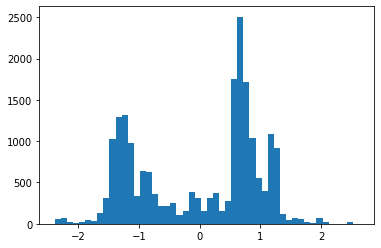

In [22]:
hist = plt.hist(housing['longitude'], bins=50)

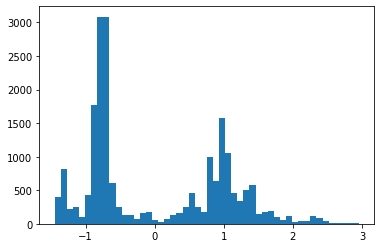

In [23]:
hist = plt.hist(housing['latitude'], bins=50)

이제 가장 중요한 median_house_value 값의 histogram을 출력해보세요

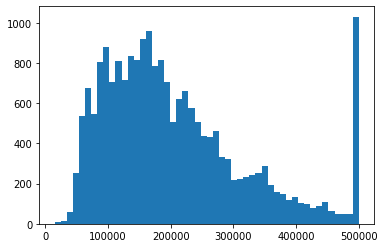

In [24]:
hist = plt.hist(housing['median_house_value'], bins=50)

median_income 값의 histogram 역시 출력해봅시다.

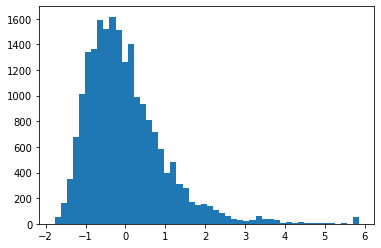

In [25]:
hist = plt.hist(housing['median_income'], bins=50)

# **Popup 실습: 각 데이터가 담은 모든 종류의 정보들에 대해서 히스토그램을 한번에 출력하는 code를 작성해보세요(hint: 반복문(for)를 사용해보세요).**

col: longitude


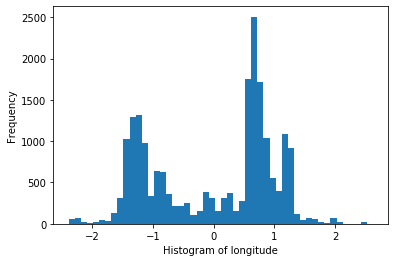

col: latitude


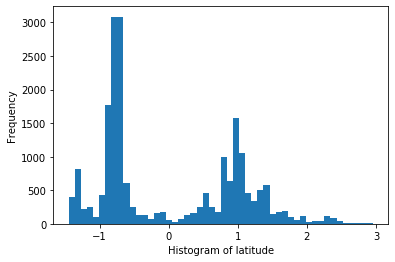

col: housing_median_age


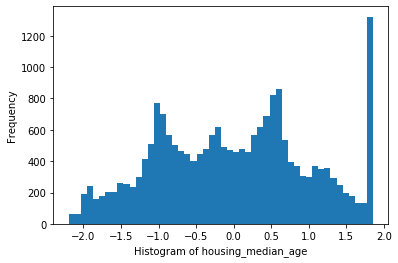

col: total_rooms


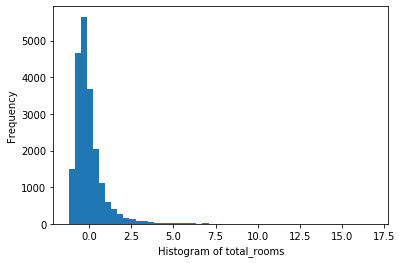

col: total_bedrooms


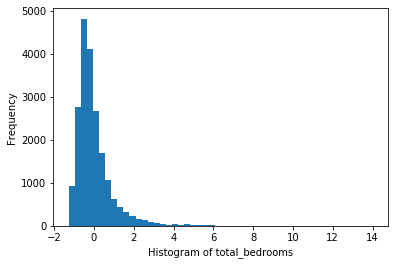

col: population


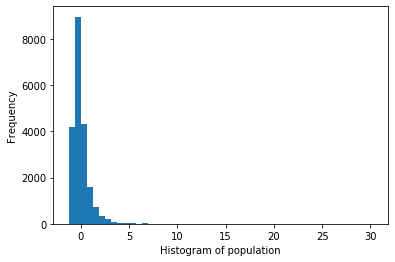

col: households


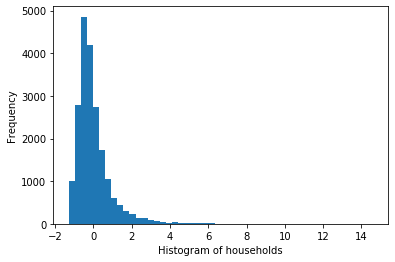

col: median_income


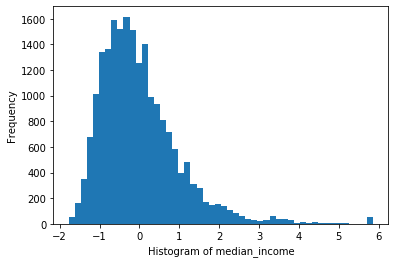

col: median_house_value


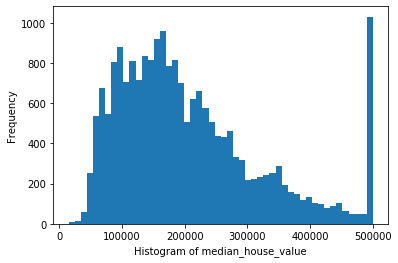

col: ocean_proximity_<1H OCEAN


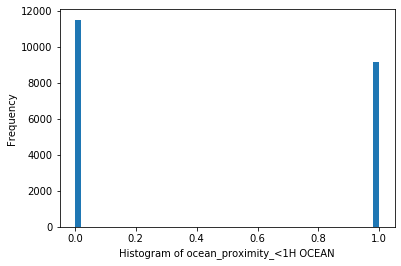

col: ocean_proximity_INLAND


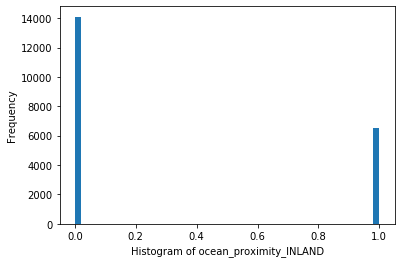

col: ocean_proximity_ISLAND


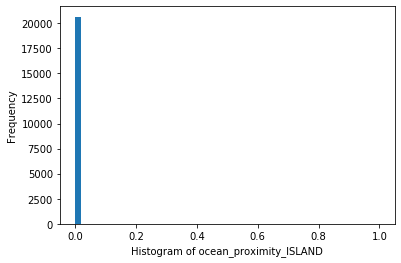

col: ocean_proximity_NEAR BAY


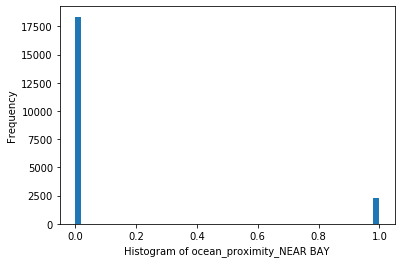

col: ocean_proximity_NEAR OCEAN


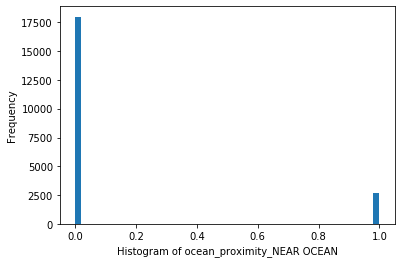

In [26]:

for col in col_list:
    print("col: "+col)
    hist = plt.hist(housing[col], bins=50)
    plt.xlabel("Histogram of "+col)
    plt.ylabel("Frequency")
    plt.show()

# **실습 #3-3: matplotlib을 활용한 복잡한 데이터 시각화를 따라해봅시다.**

C:\Users\User\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


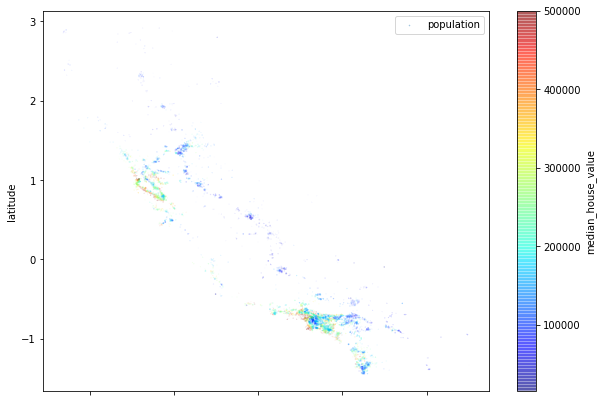

In [27]:
import matplotlib
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#    s=housing["population"]/50, label="population", figsize=(10,7),
#    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
#    sharex=False)

#plt.legend()

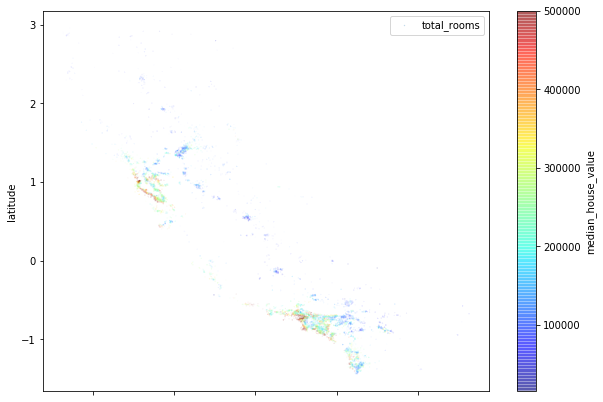

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["total_rooms"]/100, label="total_rooms", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

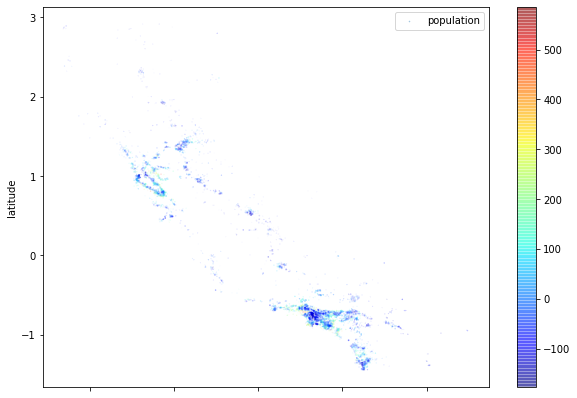

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/50, label="population", figsize=(10,7),
             c=housing["median_income"]*100, cmap=plt.get_cmap("jet"), colorbar=True)

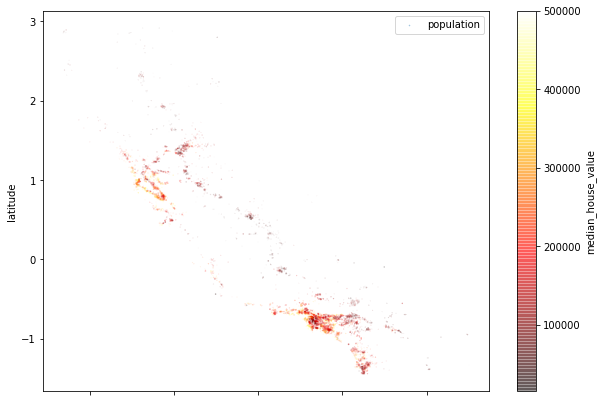

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("hot"), colorbar=True)

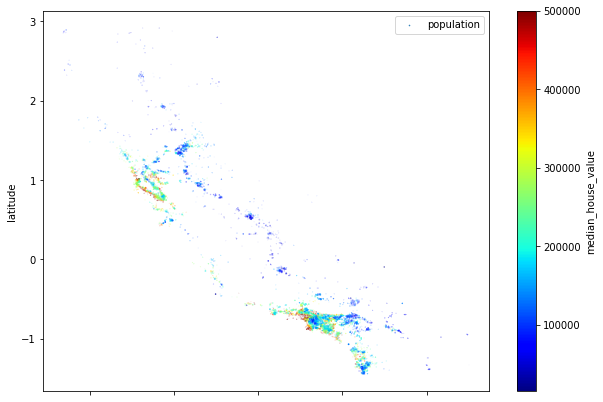

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1.0, s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

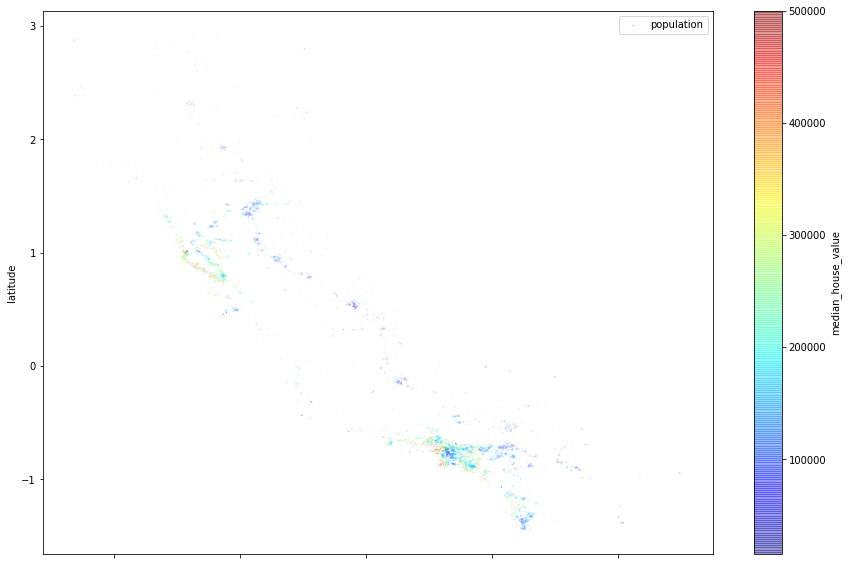

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/50, label="population", figsize=(15,10),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

# **실습 #1-4: 각 데이터가 가지고 있는 정보 사이의 관계를 살펴봅시다.**

x축을 median_income 그리고 y축을 median_house_value로 갖는 관계 그래프를 그려봅시다.

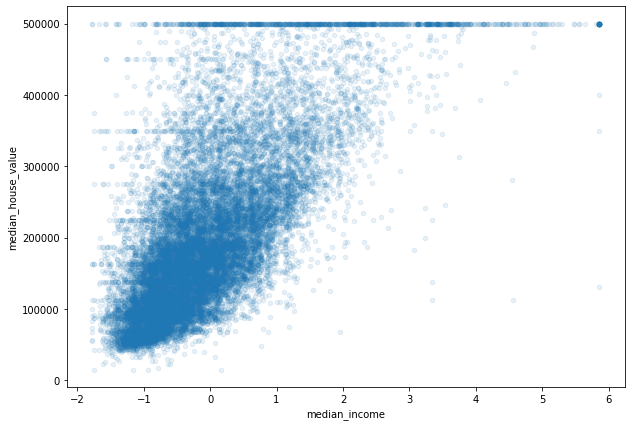

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(10,7))

# **Popup 실습: 강의자료에서 보여드렸던 다음 관계를 위에서처럼 그래프로 그려보세요.**
- total_rooms (x축), total_bedrooms (y축)
- housing_median_age (x축), median_house_value (y축)

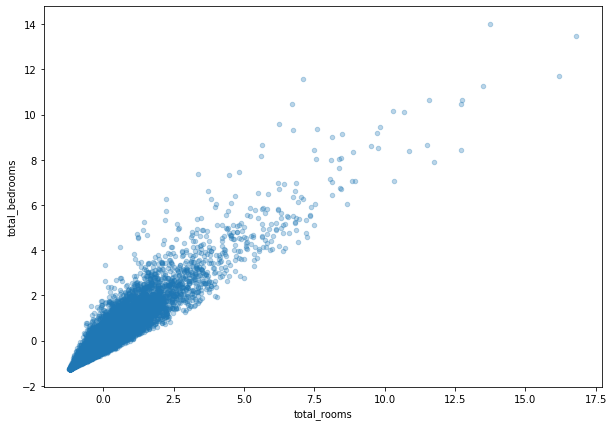

In [34]:
housing.plot(kind="scatter", x="total_rooms", y="total_bedrooms", alpha=0.3, figsize=(10,7))

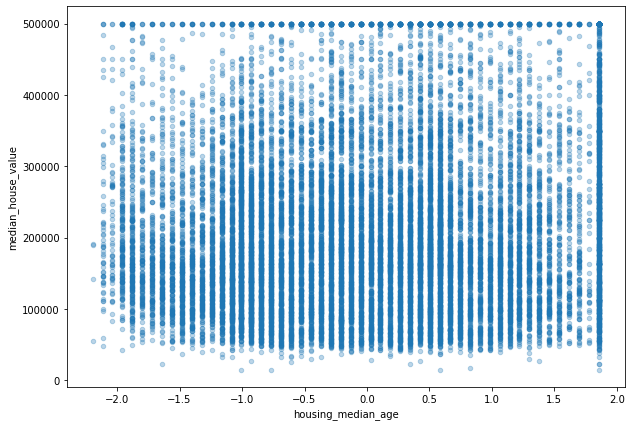

In [35]:
housing.plot(kind="scatter", x="housing_median_age", y="median_house_value", alpha=0.3, figsize=(10,7))

여러 피처(feature)들 사이의 관계를 한번에 그릴 수 있는 함수가 있습니다.
median_house_value, median_income, total_rooms, housing_median_age를 바탕으로 관계를 그려봅시다.

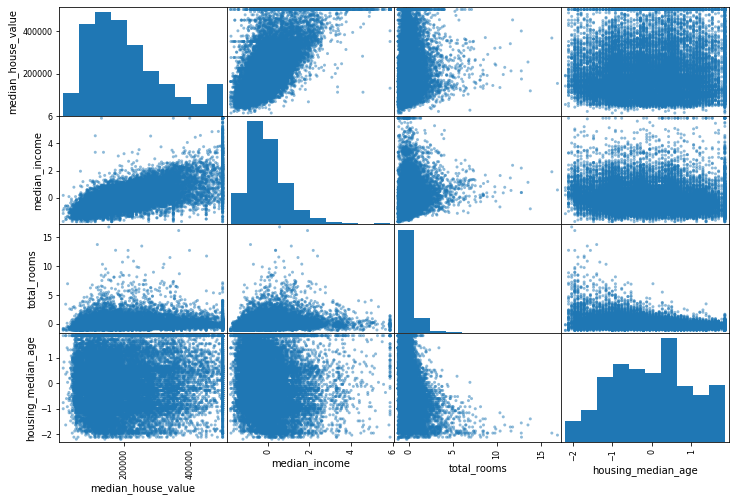

In [36]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

# **Popup 실습: 와 longitude (경도) 그리고 latitue (위도)정보를 추가로 고려하여 관계 그래프를 그려보세요!**

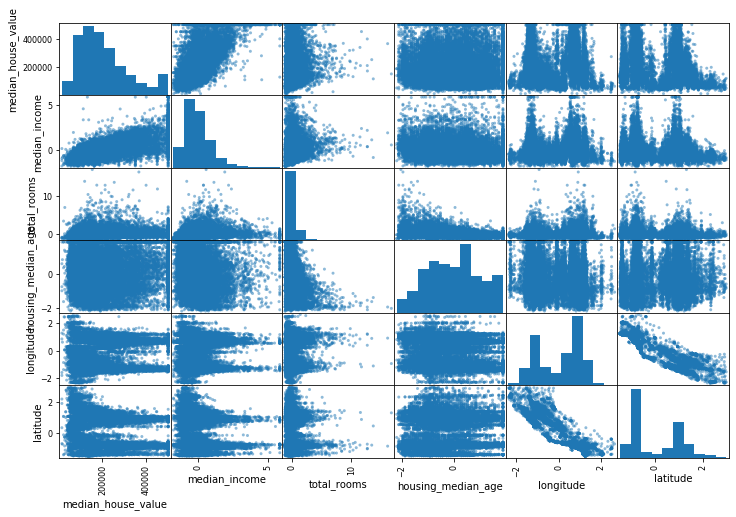

In [37]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "longitude", "latitude"]
scatter_matrix(housing[attributes], figsize=(12,8));

# **실습 #1-5: median_house_value 정보가 다른 정보와 얼마나 연관이 큰지 출력할 수 있습니다.**

In [38]:
corr_matrix = housing.corr()
corr_matrix['median_house_value']

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049686
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64

In [39]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

# **Popup 실습: total_rooms 그리고 housing_median_age가 다른 정보들과 보이는 관계도를 출력해보세요.**

In [40]:
corr_matrix['total_rooms'].sort_values(ascending=False)

total_rooms                   1.000000
total_bedrooms                0.930380
households                    0.918484
population                    0.857126
median_income                 0.198050
median_house_value            0.134153
longitude                     0.044568
ocean_proximity_INLAND        0.025624
ocean_proximity_<1H OCEAN    -0.003031
ocean_proximity_ISLAND       -0.007572
ocean_proximity_NEAR OCEAN   -0.009175
ocean_proximity_NEAR BAY     -0.023022
latitude                     -0.036100
housing_median_age           -0.361262
Name: total_rooms, dtype: float64

In [41]:
corr_matrix['housing_median_age'].sort_values(ascending=False)

housing_median_age            1.000000
ocean_proximity_NEAR BAY      0.255172
median_house_value            0.105623
ocean_proximity_<1H OCEAN     0.045300
ocean_proximity_NEAR OCEAN    0.021622
ocean_proximity_ISLAND        0.017020
latitude                      0.011173
longitude                    -0.108197
median_income                -0.119034
ocean_proximity_INLAND       -0.236645
population                   -0.296244
households                   -0.302916
total_bedrooms               -0.320451
total_rooms                  -0.361262
Name: housing_median_age, dtype: float64

# Preprocessing 

## Import the data

In [151]:
import numpy as np
import pandas as pd

#housing = pd.read_csv('housing.csv')  
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# NaN (Not a number: Empty data) will be filled with mean value.

In [152]:
median =housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median) 


In [153]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
#del housing["total_rooms"]

# Feature substitution

## total_bedrooms -> bedrooms_per_household

In [154]:
#housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] #feature를 이걸 쓰는거랑

housing['bedrooms_per_room'] =  housing['total_bedrooms'] / housing['total_rooms'] # feature를 이걸 쓰는거랑 결과가 조금씩 다릅니다. 

del housing["total_bedrooms"], housing['total_rooms']

# Standard Scaling

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_list = list(housing) 
col_list.remove("ocean_proximity") # text type
col_list.remove("median_house_value") # target variable needs not to be scaled

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate 
housing = pd.concat([housing_scaled_df, housing["median_house_value"], housing["ocean_proximity"]], axis=1)
housing.head()

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,NEAR BAY


In [156]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.275563,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.320242,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,0.115458,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.712372,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.223507,261100.0,0,0,0,1,0


# Train / Test split

**sklearn** 학습 라이브러리 안의 함수를 활용하여 데이터를 학습/테스트로 나눕니다.

In [157]:
# training - test seperation
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=45)

print('# of train_set : %.0f, # of test_set : %.0f' %(train_set.shape[0], test_set.shape[0]))

# of train_set : 16512, # of test_set : 4128


간단한 drop 함수 그리고 copy 함수를 사용하여 feature (학습에 사용되는 정보) 그리고 target (학습해서 맞춰야하는 정보)로 나눕니다.

In [158]:
# feature and label seperation of training set
train_set_features = train_set.drop('median_house_value',axis=1)
train_set_target = train_set["median_house_value"].copy()

# Based on preprocessed data, build Linear Regression model to predict median house price

## Use scikit learn packages

## Training 

In [159]:
# Part 1-1: Build Linear Regression Model by utilizing scikit-learn built-in fuctnion "LinearRegression"
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# generate model by using training set
lin_reg = LinearRegression()
lin_reg.fit(train_set_features,train_set_target)

print("Learned Parameters : ")
print("Coefficients: " , lin_reg.coef_)                        # Printing the learned weights of linear regression model
print("bias: " , lin_reg.intercept_)                   # Printing the bias (intercept) of linear regression model

print("Train_r2_score : ", lin_reg.score(train_set_features,train_set_target))



Learned Parameters : 
Coefficients:  [-55774.14086907 -56964.69903623  12971.17103303 -53562.80929239
  57272.02939275  74147.51210095   6564.46012412  10459.02523705
 -25921.29448802 -63911.36887214 143057.05886283 -30846.20870803
 -22378.18679464]
bias:  244824.92228860562
Train_r2_score :  0.6534060592966192


## Test

In [160]:
# Feature and target value Seperation of the test set
test_set_features = test_set.drop("median_house_value",axis=1)                  # drop 'median_house_value" from test_set
test_set_target = test_set["median_house_value"].copy()                    # only containing 'median_house_value" from test_set

# target value predicted from our model
final_model = lin_reg
final_predictions = final_model.predict(test_set_features)

print("Test_r2_score : ", r2_score(test_set_target,final_predictions))

delta = test_set_target - final_predictions
print("Errors (%) in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

# RMSE
final_mse = mean_squared_error(test_set_target, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE is : ", final_rmse) # Square root of the Sumg of Squared Errors

Test_r2_score :  0.6308608545588804
Errors (%) in housing value prediction :  0.2861199789930685
RMSE is :  69987.25423203211


In [161]:
# Part 1-2: Predict the median_house_value for given test samples:
print(test_set_features.iloc[2])
print(test_set_features.iloc[43])

# Do not use 'predict' function. Utilize matrix multiplication: prediction = weights * features + intercept
x1 = np.array(test_set_features.iloc[2])              # take the given input as a numpy array
x2 = np.array(test_set_features.iloc[43])             # take the given input as a numpy array
prediction1 = np.dot(lin_reg.coef_,x1) + lin_reg.intercept_              # Just write the code corresponds to " = weights * features + intercept"
prediction2 = np.dot(lin_reg.coef_,x2) + lin_reg.intercept_              # Just write the code corresponds to " = weights * features + intercept"

# Print the predicted value and real value
print("\n2th sample- predicted: {},  Real value: {}".format(prediction1, test_set_target.iloc[2]))
print("43rd sample- predicted: {},  Real value: {}".format(prediction2, test_set_target.iloc[43]))

longitude                     0.813436
latitude                     -0.792107
housing_median_age            0.108104
population                   -0.512592
households                   -0.498377
median_income                 0.336318
rooms_per_household          -0.106685
bedrooms_per_room            -0.328572
ocean_proximity_<1H OCEAN     1.000000
ocean_proximity_INLAND        0.000000
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.000000
ocean_proximity_NEAR OCEAN    0.000000
Name: 10112, dtype: float64
longitude                    -0.728878
latitude                      1.642463
housing_median_age           -1.481058
population                   -0.132879
households                    0.029976
median_income                 0.108870
rooms_per_household           0.287740
bedrooms_per_room            -0.717413
ocean_proximity_<1H OCEAN     0.000000
ocean_proximity_INLAND        1.000000
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.0000

# **실습 #1-9: 전처리가 끝난 학습 데이터를 바탕으로 scikit-learn 라이브러리를 통해 집값 예측 정규화 Ridge 회귀 모델을 학습해봅시다.**

## 4. Ridge Regression - Lab Activity #3 for this week (2020-10-07)
__scikit-learn__ provides *Ridge* function

In [290]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# ridge regression
model_ridge = Ridge(alpha = 100)                                                # alpha means the costant coefficient for regularization term         
model_ridge.fit(train_set_features, train_set_target)                           # train ridge regression with train_set_features and train_set_traget

print("Train_score : ", model_ridge.score(train_set_features,train_set_target))

# ridge RMSE
ridge_predicted = model_ridge.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target,ridge_predicted))

delta = test_set_target - ridge_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_ridge_mse = mean_squared_error(test_set_target, ridge_predicted)
final_ridge_rmse = np.sqrt(final_ridge_mse)
print("final_ridge_RMSE : ", final_ridge_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

Train_score :  0.6479280606855488
Test_score :  0.6294152624504659
Errors in housing value prediction :  0.28794564807298
final_ridge_RMSE :  70124.15946923144


# **실습 #1-10: 전처리가 끝난 학습 데이터를 바탕으로 scikit-learn 라이브러리를 통해 집값 예측 정규화 Lasso 회귀 모델을 학습해봅시다.**

In [289]:
from sklearn.linear_model import Lasso

# lasso regression
model_lasso = Lasso(alpha = 1000)
model_lasso.fit(train_set_features,train_set_target)

print("Train_score : ", model_lasso.score(train_set_features,train_set_target))

lasso_predicted = model_lasso.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target,lasso_predicted))

delta = test_set_target - lasso_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_lasso_mse = mean_squared_error(test_set_target, lasso_predicted)
final_lasso_rmse = np.sqrt(final_lasso_mse)
print("RMSE is : ", final_lasso_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

Train_score :  0.6433762067096817
Test_score :  0.6314423501074209
Errors in housing value prediction :  0.2854219349746558
RMSE is :  69932.10793113596


# **Extra Activity #1-11: scikit-learn 라이브러리의 MLP (딥러닝) 라이브러리를 이용해서 집값을 더 정확히 예측해봅시다.**

In [323]:
# Set hidden_layer_sizes (32), (64), (64,32), (32,54,32) max_iter=1000

from sklearn.neural_network import MLPRegressor

# MLP regressor
model_MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (32,64,32), max_iter= 1000, solver= 'lbfgs')
model_MLP.fit(train_set_features,train_set_target)

print("Train_score : ", model_MLP.score(train_set_features,train_set_target))

MLP_predicted = model_MLP.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target,MLP_predicted))

delta = test_set_target - MLP_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_MLP_mse = mean_squared_error(test_set_target, MLP_predicted)
final_MLP_rmse = np.sqrt(final_MLP_mse)
print("RMSE is : ", final_MLP_rmse)

Train_score :  0.8498967003264114
Test_score :  0.8097313158451622
Errors in housing value prediction :  0.17865134276475914
RMSE is :  50246.701993231174
